https://archive.ics.uci.edu/dataset/186/wine+quality

## Wine Quality

___Dataset Information___

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and **not balanced** (e.g. there are many more normal wines than excellent or poor ones). **Outlier detection algorithms** could be used to detect the few excellent or poor wines. Also, **we are not sure if all input variables are relevant**. So it could be interesting to test feature selection methods.

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [285]:
data_red = pd.read_csv('winequality-red.csv' , sep = ';')

In [286]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='count'>

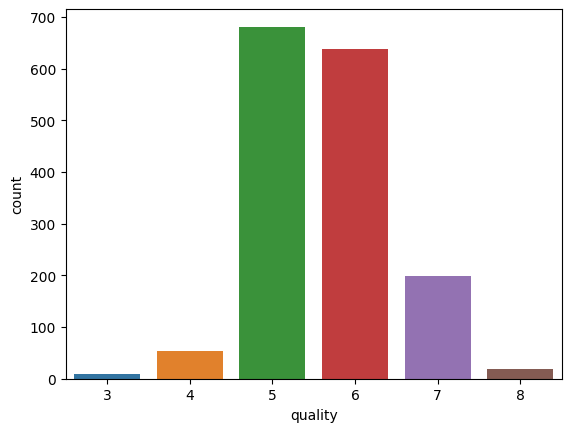

In [287]:
sns.countplot(data = data_red , x= data_red['quality'] )

# EDA

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

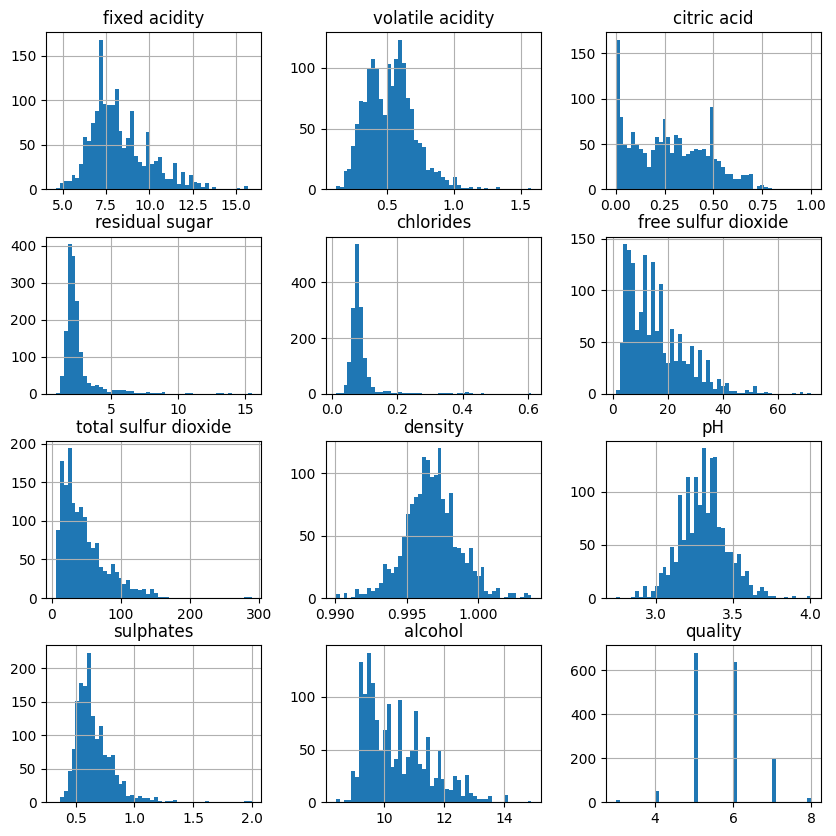

In [288]:
data_red.hist(bins=50 , figsize=(10,10))

In [289]:
X = data_red.drop('quality' , axis=1)
y= data_red['quality']

In [290]:
print(X.shape , y.shape)

(1599, 11) (1599,)


<AxesSubplot:>

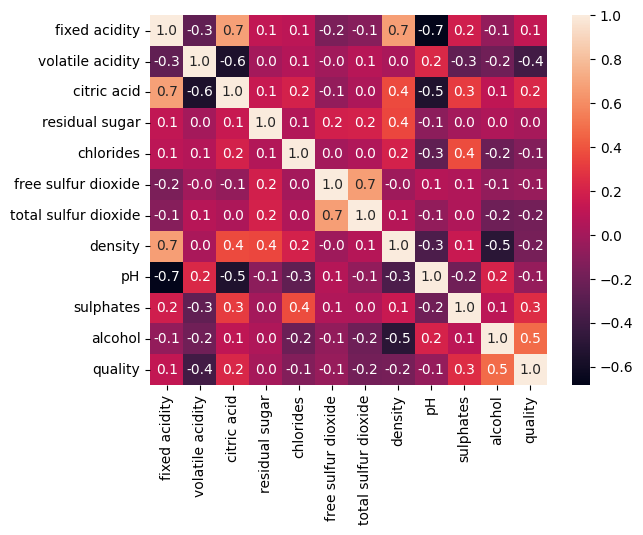

In [291]:
sns.heatmap(data_red.corr() , annot=True , fmt='0.1f')

### Handeling imbalanced data set
Implementing Oversampling (_Increases the number of data points in the minority class by duplicating existing examples or creating new synthetic ones_) for Handling Imbalanced

In [292]:
from imblearn.combine import SMOTETomek

In [293]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [294]:
print(X_res.shape , y_res.shape)

(3914, 11) (3914,)


(3914, 12)


<AxesSubplot:xlabel='quality', ylabel='count'>

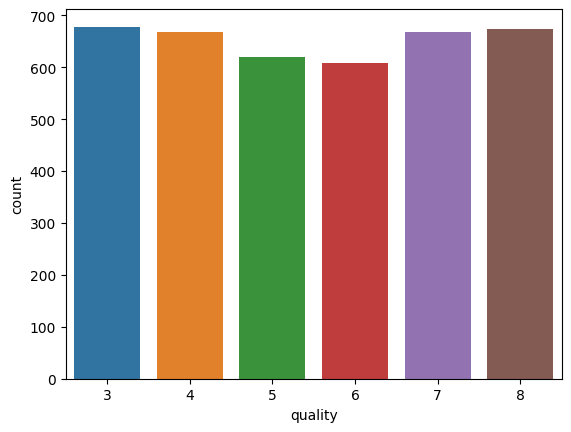

In [295]:
newdata_red = pd.concat([pd.DataFrame(X_res) , pd.DataFrame(y_res)], axis=1)
print(newdata_red.shape)
sns.countplot(data = newdata_red , x= newdata_red.quality)

<AxesSubplot:>

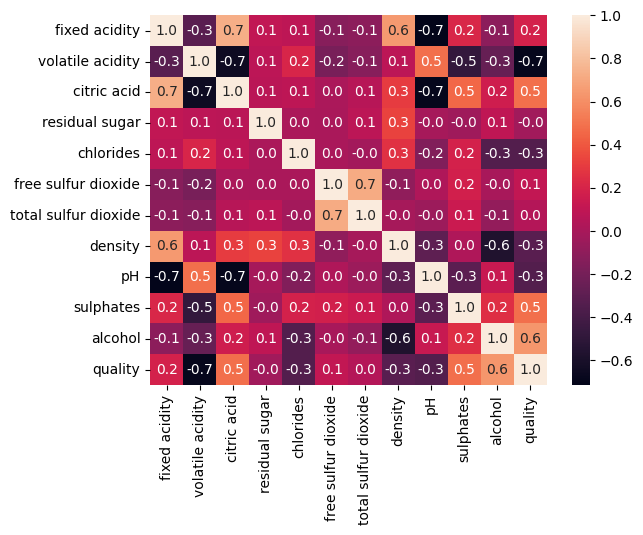

In [296]:
sns.heatmap(newdata_red.corr() , annot=True , fmt='0.1f')

### Feature importance ranking
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a **score** for each feature of your data; *the higher the score, the more important or relevant the feature is to your output variable*.

Apply SelectKBest class to extract top 11 best features

In [297]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [298]:
bestfeatures = SelectKBest(score_func=chi2 , k=11)
fit = bestfeatures.fit(X_res,y_res)

In [299]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_res.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [300]:
featureScores.sort_values('Score' , ascending=False)

,Features,Score
6,total sulfur dioxide,12039.146808
5,free sulfur dioxide,1967.936607
10,alcohol,233.529917
1,volatile acidity,222.923349
2,citric acid,144.090882
0,fixed acidity,74.964766
9,sulphates,35.416040
3,residual sugar,22.657232
4,chlorides,12.719955
8,pH,3.629136


<AxesSubplot:xlabel='Score', ylabel='Features'>

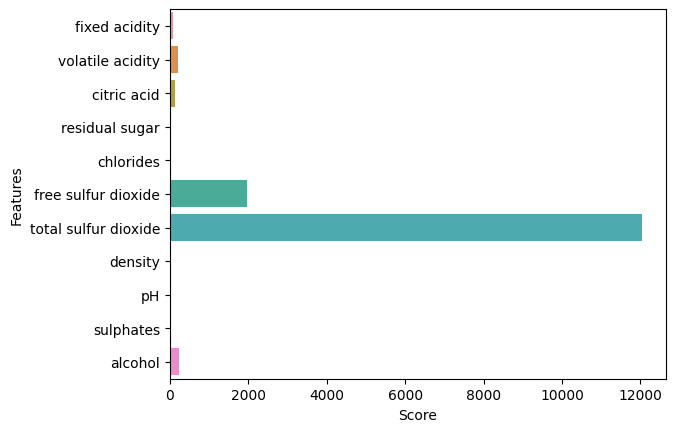

In [301]:
sns.barplot(data = featureScores , y = featureScores.Features  , x=featureScores.Score  , orient='h')

In [302]:
newdata_red.drop(['pH', 'density'] , axis=1 , inplace= True)

## Reordering labeles

We have to assign a label in the range(0,5) to each of our quality values unless our neural network can not find the dataset's loss.

In [303]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(newdata_red.quality)

print(lb.classes_)

newdata_red.quality = lb.transform(newdata_red.quality)

[3 4 5 6 7 8]


In [304]:
'''
# We can also use the following lines of code to reorder or labels.

quilities = newdata_red.quality.value_counts().index.to_list()
quilities.sort()
newdata_red.replace(to_replace=quilities ,
                    value=list(range(len(newdata_red.quality.value_counts().index.to_list()))),
                    inplace=True)
'''

'\n# We can also use the following lines of code to reorder or labels.\n\nquilities = newdata_red.quality.value_counts().index.to_list()\nquilities.sort()\nnewdata_red.replace(to_replace=quilities ,\n                    value=list(range(len(newdata_red.quality.value_counts().index.to_list()))),\n                    inplace=True)\n'

In [305]:
newdata_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,2


## Train Test Split

In [306]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [307]:
dummy_y = np_utils.to_categorical(newdata_red['quality'])

In [308]:
X_train, X_test, y_train, y_test = train_test_split(newdata_red.drop('quality', axis=1),
                                                    dummy_y,
                                                    test_size=0.1, random_state=42)

## Data standardization

In [309]:
from sklearn.preprocessing import StandardScaler

In [310]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementing Learning Models

## 1) Deep learning model

In [311]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras  as keras

In [312]:
X_train.shape

(3522, 9)

In [313]:
model = Sequential()

model.add(Dense(9, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(12, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(12, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation= 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [314]:
checkpoint_path= 'weights.h5'

earlystoping = keras.callbacks.EarlyStopping(monitor='val_loss' , mode = 'min' , patience=30)
checkpoint = keras.callbacks.ModelCheckpoint(filepath= checkpoint_path , monitor= 'val_accuracy', mode='max' ,save_best_only=True)

In [315]:
model.fit(X_train, y_train,
          validation_split =0.1,
          verbose= 1,
          epochs = 400, 
          batch_size=256,
          callbacks = [earlystoping,checkpoint])

Epoch 1/400


13/13 [==============================] - 2s 24ms/step - loss: 2.1035 - accuracy: 0.1568 - val_loss: 1.8200 - val_accuracy: 0.1983
Epoch 2/400
13/13 [==============================] - 0s 4ms/step - loss: 1.9839 - accuracy: 0.1556 - val_loss: 1.8034 - val_accuracy: 0.1728
Epoch 3/400
13/13 [==============================] - 0s 6ms/step - loss: 1.9348 - accuracy: 0.1486 - val_loss: 1.7960 - val_accuracy: 0.1586
Epoch 4/400
13/13 [==============================] - 0s 7ms/step - loss: 1.8842 - accuracy: 0.1556 - val_loss: 1.7925 - val_accuracy: 0.1728
Epoch 5/400
13/13 [==============================] - 0s 5ms/step - loss: 1.8636 - accuracy: 0.1448 - val_loss: 1.7904 - val_accuracy: 0.1983
Epoch 6/400
13/13 [==============================] - 0s 8ms/step - loss: 1.8402 - accuracy: 0.1543 - val_loss: 1.7897 - val_accuracy: 0.2068
Epoch 7/400
13/13 [==============================] - 0s 7ms/step - loss: 1.8302 - accuracy: 0.1631 - val_loss: 1.7893 - val_accuracy: 0.2125
Epoch 8/400
13/13 [=====

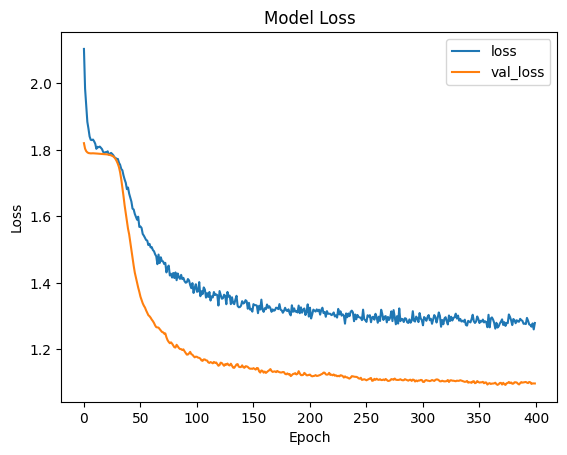

In [316]:
plt.plot(model.history.history['loss'], label='loss' )
plt.plot(model.history.history['val_loss'] , label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')


plt.legend()

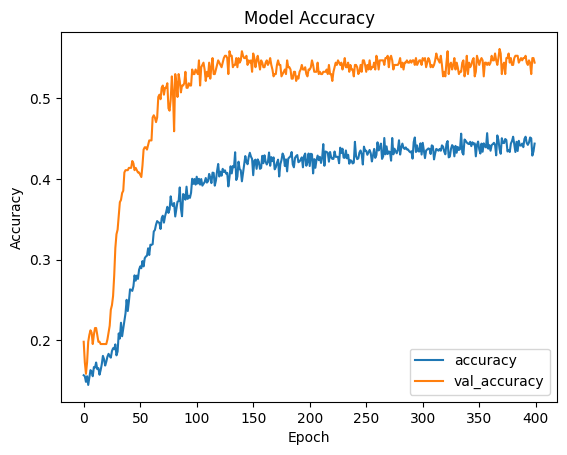

In [317]:
plt.plot(model.history.history['accuracy'], label='accuracy' )
plt.plot(model.history.history['val_accuracy'] , label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()

In [318]:
model.load_weights('weights.h5')

In [319]:
test_loss, test_acc = model.evaluate(X_test, y_test) #if you use model.fit() followed by model.evaluate() History will be Empty

13/13 [==============================] - 0s 1ms/step - loss: 1.1642 - accuracy: 0.5179


In [320]:
accuracy_nn = test_acc

In [321]:
print(f"test_acc: {test_acc*100} %")
print(f"test_loss: {test_loss*100} %")

test_acc: 51.78571343421936 %
test_loss: 116.4226770401001 %


For more information about loss and accuracy differences: 
https://datascience.stackexchange.com/questions/42599/what-is-the-relationship-between-the-accuracy-and-the-loss-in-deep-learning

In [322]:
predictions = model.predict(X_test)

13/13 [==============================] - 0s 3ms/step


In [323]:
arg = 8

In [324]:
predictions[arg]

array([0.35062397, 0.34788355, 0.18587573, 0.10562007, 0.00955633,
       0.00044029], dtype=float32)

In [325]:
predictions[arg].argmax()

0

In [326]:
y_test[arg]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

## 2) Support Vector Machine

In [327]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

###### Startified CV is more useful when you have a huge, imbalanced data set

In [328]:
model_svc = SVC()

In [329]:
y_train_new = np.argmax(y_train ,axis=1)

In [330]:
score_svc = cross_val_score(model_svc , X_train, y_train_new, cv=10 )

In [331]:
score_svc

array([0.78470255, 0.72804533, 0.75      , 0.72443182, 0.76136364,
       0.69602273, 0.75284091, 0.75568182, 0.75284091, 0.73579545])

In [332]:
accuracy_svc = score_svc.mean()

In [333]:
print(f"accuracy is {score_svc.mean()*100 } %")

accuracy is 74.41725148081379 %


## 3) Random Forest

In [334]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
model_RFC = RandomForestClassifier()

In [336]:
score_rfc = cross_val_score(model_RFC ,  X_train, y_train_new, cv=10 )

In [337]:
score_rfc

array([0.92351275, 0.88101983, 0.88352273, 0.84659091, 0.86647727,
       0.84375   , 0.87784091, 0.86931818, 0.875     , 0.88920455])

In [338]:
accuracy_rfc = score_rfc.mean()

In [339]:
print(f"accuracy is {accuracy_rfc*100 } %")

accuracy is 87.56237123358227 %


<AxesSubplot:>

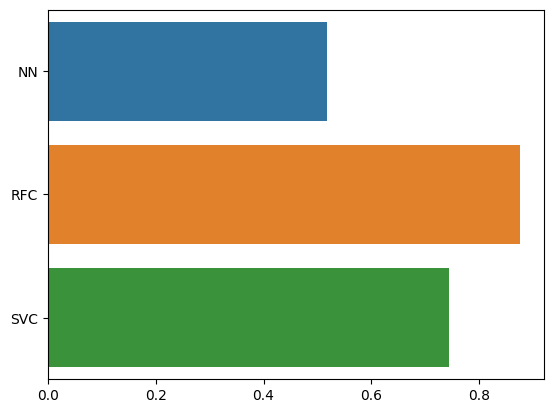

In [340]:
sns.barplot(y=['NN' , 'RFC' , 'SVC'] , x=[accuracy_nn, accuracy_rfc  ,accuracy_svc])